#**Aula 2:**

- Vimos as primeiras previsões com o PROPHET;

- Fizemos a decomposição de séries temporais.

In [42]:
#importando as bibliotecas:
import pandas as pd
from fbprophet import Prophet
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

mpl.rcParams['font.size'] = 14
mpl.rcParams['figure.figsize'] = (10,6)


In [4]:
url = 'https://github.com/vqrca/bootcamp_alura_aulas/blob/main/Modulo_3/dados_covid_sp.zip?raw=true'

In [5]:
#importando os dados:
dados = pd.read_csv(url, sep = ';', compression='zip')
dados.head()

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,obitos_novos,obitos_pc,obitos_mm7d,letalidade,nome_ra,cod_ra,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
0,Adamantina,3500105,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de Presidente Prudente,9,Marília,5,33894,7398,41199,0,8.0,"-21,6820","-51,0737",9
1,Adolfo,3500204,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de São José do Rio Preto,14,São José do Rio Preto,15,3447,761,21106,0,8.0,"-21,2325","-49,6451",9
2,Aguaí,3500303,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de Campinas,4,São João da Boa Vista,14,35608,5245,47455,0,8.0,"-22,0572","-46,9735",9
3,Águas da Prata,3500402,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de Campinas,4,São João da Boa Vista,14,7797,1729,14267,0,8.0,"-21,9319","-46,7176",9
4,Águas de Lindóia,3500501,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de Campinas,4,Campinas,3,18374,3275,6013,0,8.0,"-22,4733","-46,6314",9


In [6]:
#formatando os dados da coluna 'datahora':
dados['datahora'] = pd.to_datetime(dados['datahora'], format='%Y-%m-%d')

In [7]:
#Escolhendo um munícipio específico:
dados_sp = dados.query('nome_munic == "São Paulo"')

Definindo os dados que irão para previsão:

ds: coluna 'datahora'

y: coluna 'casos_novos'

**y é o que iremos prever!!!**

In [11]:
df = pd.DataFrame()

In [12]:
df['ds'] = dados_sp['datahora']

In [13]:
df['y'] = dados_sp['casos_novos'] #y é o que queremos prever

In [14]:
df

,ds,y
562,2020-02-25,0
1207,2020-02-26,0
1852,2020-02-27,0
2497,2020-02-28,1
3142,2020-02-29,0
...,...,...
283072,2021-05-08,1998
283717,2021-05-09,1285
284362,2021-05-10,538
285007,2021-05-11,2941


O Prophet tem um algoritmo de *Machine learning*, que vai buscar a reta que melhor se ajusta. Depois de descobrir os valores de a e b, é possível prever datas futuras. 

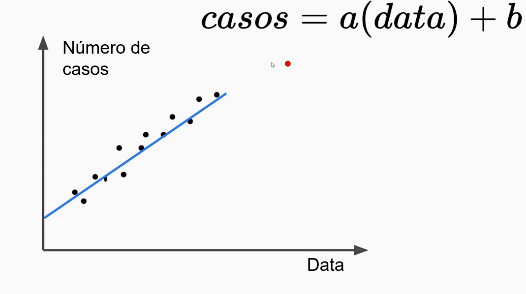


Criação do modelo:

In [15]:
modelo = Prophet()

o Fit serve para ajustar a reta:

In [16]:
modelo.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [17]:
dataFramefuture = modelo.make_future_dataframe(periods=30) #periods é o número de dias da previsão
dataFramefuture.head()

,ds
0,2020-02-25
1,2020-02-26
2,2020-02-27
3,2020-02-28
4,2020-02-29


Para prever os valores para essas datas:

In [18]:
previsao = modelo.predict(dataFramefuture)

In [19]:
previsao.head()
#o yhat é a nossa estimativa

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-02-25,-114.303728,-810.215348,1649.661301,-114.303728,-114.303728,500.316952,500.316952,500.316952,500.316952,500.316952,500.316952,0.0,0.0,0.0,386.013224
1,2020-02-26,-96.932780,-739.839390,1732.026742,-96.932780,-96.932780,554.767711,554.767711,554.767711,554.767711,554.767711,554.767711,0.0,0.0,0.0,457.834930
2,2020-02-27,-79.561833,-551.987547,1707.197681,-79.561833,-79.561833,650.710000,650.710000,650.710000,650.710000,650.710000,650.710000,0.0,0.0,0.0,571.148167
3,2020-02-28,-62.190885,-891.750179,1449.978625,-62.190885,-62.190885,368.442066,368.442066,368.442066,368.442066,368.442066,368.442066,0.0,0.0,0.0,306.251181
4,2020-02-29,-44.819937,-1158.277246,1130.377616,-44.819937,-44.819937,30.824737,30.824737,30.824737,30.824737,30.824737,30.824737,0.0,0.0,0.0,-13.995200


Plotando a previsão:

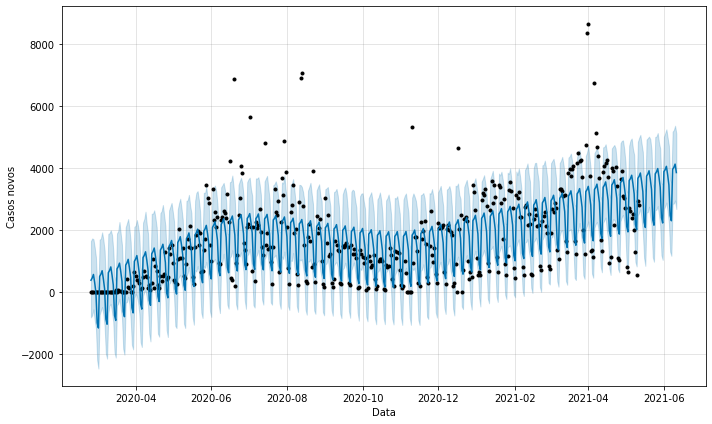

In [20]:
modelo.plot(previsao, xlabel='Data', ylabel='Casos novos', figsize=(10,6));
            

Esses pontos são os nossos dados reais. O modelo ajustado é a curva em azul escuro e temos valores para frente, que foram previstos para 30 dias. Há uma região azul mais clara que é o nosso intervalo de confiança. Alguns pontos estão fora do intervalo de confiança e isso significa que o modelo só ajustou a maioria dos dados. 

Como saber se essa previsão é boa???

Dividindo os dados em treino e teste!

In [21]:
df = pd.DataFrame()

Separando os dados de treino:

In [24]:
df['ds'] = dados_sp['datahora'][:400]

In [25]:
df['y'] = dados_sp['casos_novos'][:400]

In [26]:
modelo = Prophet()

In [27]:
modelo.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [28]:
dataFramefuture = modelo.make_future_dataframe(periods=43)
dataFramefuture.head()

,ds
0,2020-02-25
1,2020-02-26
2,2020-02-27
3,2020-02-28
4,2020-02-29


In [29]:
previsao = modelo.predict(dataFramefuture)

In [30]:
previsao.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-02-25,-137.621348,-811.318830,1304.767196,-137.621348,-137.621348,457.699352,457.699352,457.699352,457.699352,457.699352,457.699352,0.0,0.0,0.0,320.078004
1,2020-02-26,-119.843618,-787.464762,1351.313187,-119.843618,-119.843618,456.859942,456.859942,456.859942,456.859942,456.859942,456.859942,0.0,0.0,0.0,337.016324
2,2020-02-27,-102.065887,-562.936533,1530.061711,-102.065887,-102.065887,596.079908,596.079908,596.079908,596.079908,596.079908,596.079908,0.0,0.0,0.0,494.014021
3,2020-02-28,-84.288157,-807.959665,1364.152308,-84.288157,-84.288157,340.781628,340.781628,340.781628,340.781628,340.781628,340.781628,0.0,0.0,0.0,256.493471
4,2020-02-29,-66.510426,-1147.036689,1159.793564,-66.510426,-66.510426,59.114795,59.114795,59.114795,59.114795,59.114795,59.114795,0.0,0.0,0.0,-7.395631


Separando os dados de teste:

In [31]:
df_teste = pd.DataFrame()
df_teste['ds'] = dados_sp['datahora'][400:]
df_teste['y'] = dados_sp['casos_novos'][400:]

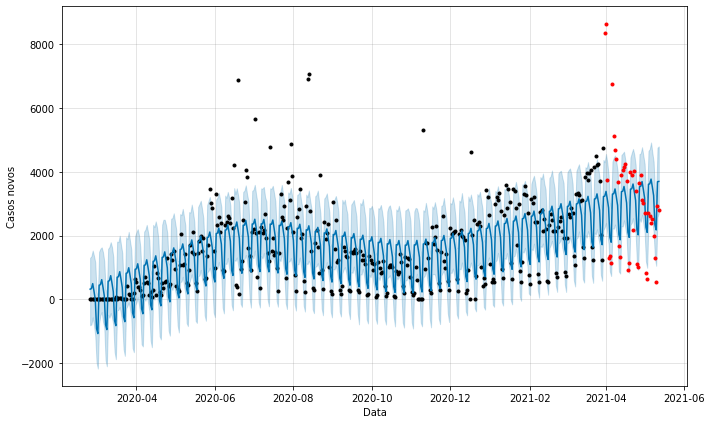

In [32]:
modelo.plot(previsao, xlabel='Data', ylabel='Casos novos', figsize=(10,6));
plt.plot(df_teste['ds'], df_teste['y'], '.r') 

A divisão entre treino e teste é de extrema importância, para saber se o modelo está bom. Vemos muitos pontos vermelhos (do teste) fora do ajuste. Portanto, ajustes precisam ser realizados, pois os pontos de teste precisam estar mais aderentes à curva. 

Análise da tendência e de como os dados se comportam semanalmente:

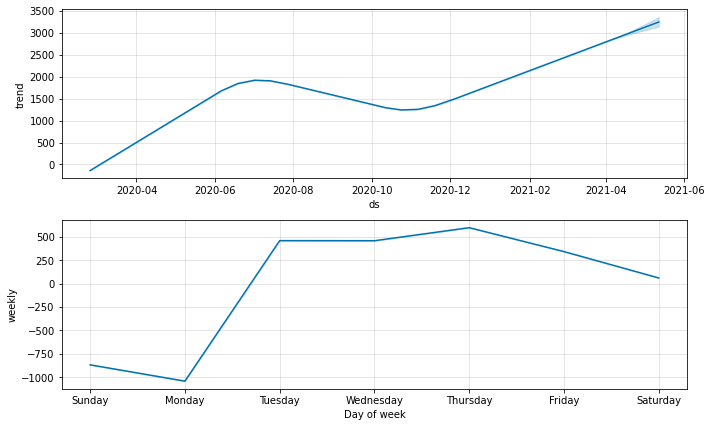

In [33]:
modelo.plot_components(previsao, figsize=(10,6));

O primeiro gráfico representa a tendência ao longo do tempo.
O segundo gráfico representa a sazonalidade semanal, mostrando que nos domingos e segundas há uma diminuição da notificação dos casos.

##**Desafio 08: Mudar os períodos de previsão.**

Os períodos de previsão testados são: 30, 60, 90, 120, 150 e 180 dias. Os dados foram separados em treino e teste (representados em vermelho).

In [55]:
#Função para dividir os dados em treino e teste (70% para treino e 30% para teste):

def split_time_treino_teste(dados, x, y, periodo=None ,test_size=0.3):
    
    dados = dados.sort_values(x)
    
    df_treino = pd.DataFrame()
    df_teste = pd.DataFrame()
    
    if periodo == None:
        split_ponto = int(len(dados) * (1-test_size))
    else:
        split_ponto = len(dados) - periodo
        
    df_treino['ds'] = dados[x][0:split_ponto]
    df_teste['ds'] = dados[x][split_ponto:]
    df_treino['y'] = dados[y][0:split_ponto]
    df_teste['y_teste'] = dados[y][split_ponto:]
    
    return df_treino, df_teste

In [56]:
treino, teste = split_time_treino_teste(dados_sp, 'datahora', 'casos_novos')

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

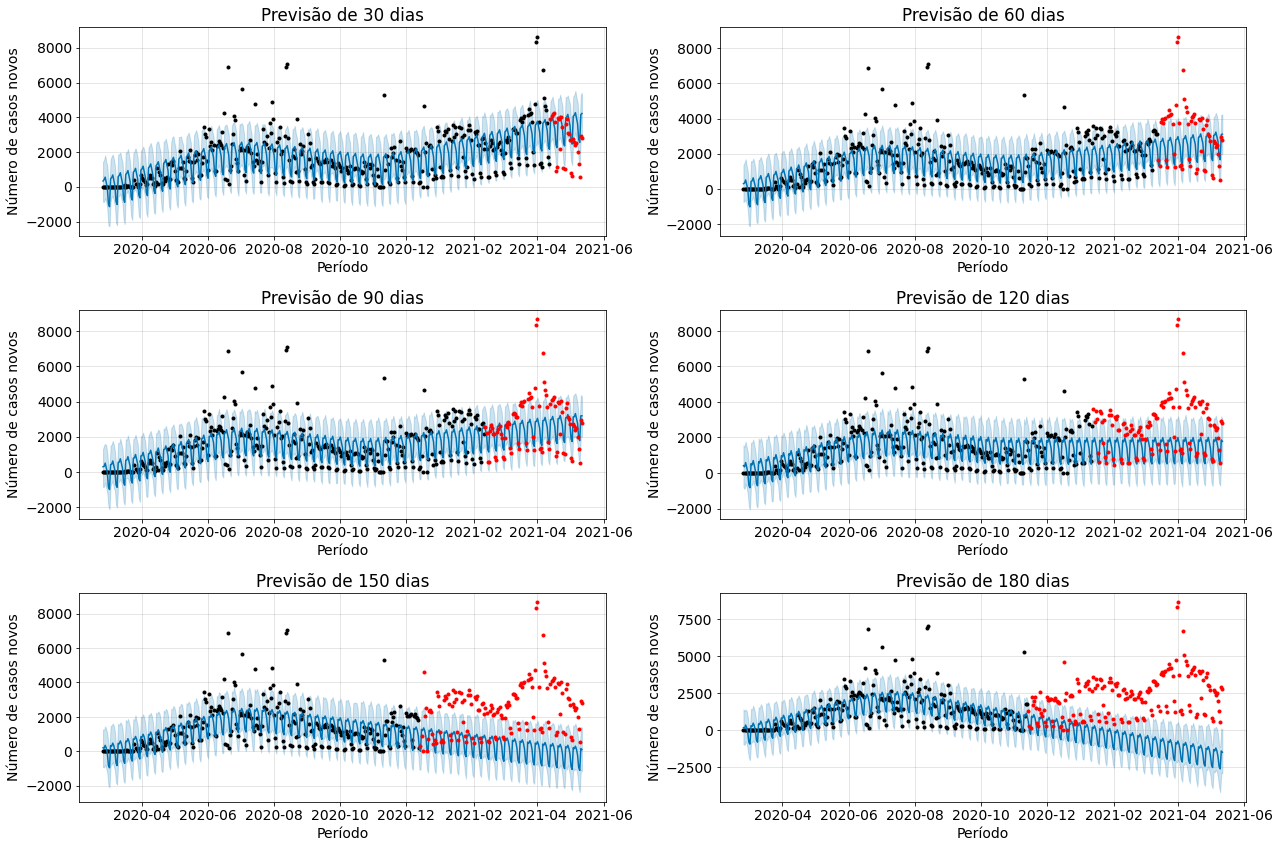

In [86]:
fig, ax = plt.subplots(3,2, figsize=(18,12))
i=0
j=0

for intervalo in range(30,210,30):
    
    treino, teste = split_time_treino_teste(dados_sp, 'datahora', 'casos_novos', periodo=intervalo)
    modelo = Prophet()
    modelo.fit(treino)
    previsao = modelo.predict(modelo.make_future_dataframe(periods=intervalo))
    modelo.plot(previsao, xlabel='Período', ylabel='Número de casos novos', ax=ax[i,j])
    ax[i,j].plot(teste['ds'], teste['y_teste'], '.r')
    ax[i,j].set_title(f'Previsão de {intervalo} dias')
    plt.sca(ax[i,j])
    
    if j == 1:
        j=0
        i+=1
    else:
        j+=1

plt.show()

A partir desses gráficos é possível observar que quanto maior o período de previsão é menor o ajuste dos dados teste. 

##**Desafio 09: Explorar a documentação do Prophet e melhorar os gráficos.**

[Documentação](https://facebook.github.io/prophet/docs/quick_start.html)

[Repositório - GitHub](https://github.com/facebook/prophet)

##**Desafio 10: Fazer todo o processo de previsão para o número de casos acumulados.**

In [ ]:
df = pd.DataFrame()


In [ ]:
df['ds'] = dados_sp['datahora'][:400]

In [ ]:
df['y'] = dados_sp['casos'][:400]

In [ ]:
modelo = Prophet()

In [ ]:
modelo.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
dataFramefuture = modelo.make_future_dataframe(periods=60)

In [ ]:
previsao = modelo.predict(dataFramefuture)
previsao.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-02-25,-463.574765,-3668.893093,2064.579454,-463.574765,-463.574765,-525.287432,-525.287432,-525.287432,-525.287432,-525.287432,-525.287432,0.0,0.0,0.0,-988.862197
1,2020-02-26,-427.851221,-3597.105457,2089.630879,-427.851221,-427.851221,-278.233136,-278.233136,-278.233136,-278.233136,-278.233136,-278.233136,0.0,0.0,0.0,-706.084358
2,2020-02-27,-392.127678,-2718.588878,2893.899100,-392.127678,-392.127678,342.173314,342.173314,342.173314,342.173314,342.173314,342.173314,0.0,0.0,0.0,-49.954364
3,2020-02-28,-356.404135,-2530.697011,3202.091723,-356.404135,-356.404135,715.462100,715.462100,715.462100,715.462100,715.462100,715.462100,0.0,0.0,0.0,359.057964
4,2020-02-29,-320.680592,-2471.315929,3506.121296,-320.680592,-320.680592,802.543148,802.543148,802.543148,802.543148,802.543148,802.543148,0.0,0.0,0.0,481.862556


In [ ]:
df_teste = pd.DataFrame()
df_teste['ds'] = dados_sp['datahora'][400:]
df_teste['y'] = dados_sp['casos'][400:]

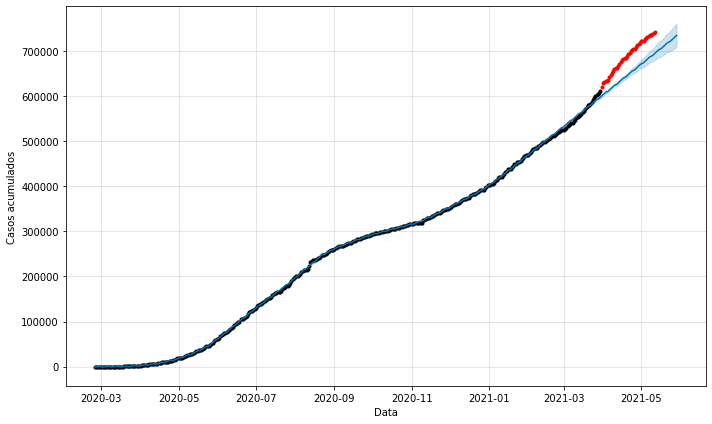

In [ ]:
modelo.plot(previsao, xlabel='Data', ylabel='Casos acumulados', figsize=(10,6))                                                                     
plt.plot(df_teste['ds'], df_teste['y'], '.r') 

Nesse caso, com os dados de casos acumulados, vemos que há quase uma reta. Quando analisamos os dados de teste, vemos os pontos vermelhos (do teste) fora da previsão. 

Análise da tendência e de como os dados se comportam semanalmente:

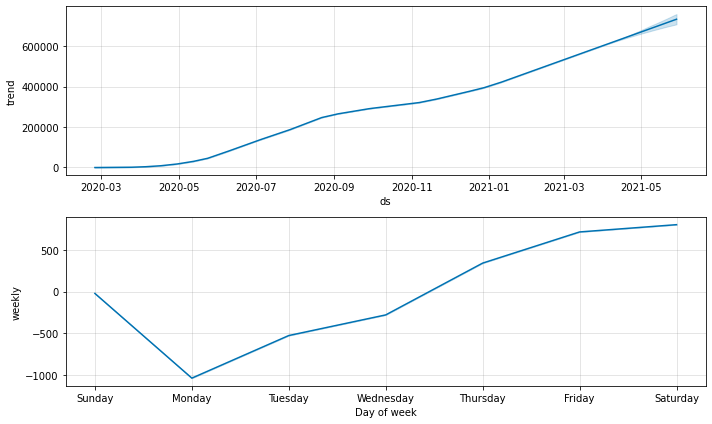

In [ ]:
modelo.plot_components(previsao, figsize=(10,6));

O primeiro gráfico representa a tendência ao longo do tempo, que é praticamente linear.
O segundo gráfico representa a sazonalidade semanal, mostrando que nos domingos e segundas há uma diminuição da notificação dos casos.